# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
env.close()

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):

        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)

        self.bn0 = nn.BatchNorm1d(state_size)
        self.fc1 = nn.Linear(state_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, action_size)


    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = self.bn0(state)
        x = F.selu(self.bn1(self.fc1(x)))
        x = F.selu(self.bn2(self.fc2(x)))
        x = F.selu(self.bn3(self.fc3(x)))
        return torch.tanh(self.fc4(x))

class Critic(nn.Module):
    def __init__(self, state_size, action_size, seed):

        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        self.bn0 = nn.BatchNorm1d(state_size)
        self.fcs1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128 + action_size, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)


    def forward(self, state, action):
        state = self.bn0(state)
        x_state = F.selu(self.fcs1(state))
        x = torch.cat((x_state, action), dim=1)
        x = F.selu(self.fc2(x))
        x = F.selu(self.fc3(x))
        x = F.selu(self.fc4(x))
        return  F.selu(self.fc5(x))

In [178]:
import numpy as np
import random
import copy
from collections import namedtuple, deque


import torch
import torch.nn.functional as F
import torch.optim as optim


GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0.000     # L2 weight decay
BATCH_SIZE = 128  #1024         # minibatch size
BUFFER_SIZE = int(1e6)  # replay buffer size

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        
        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)
        
        self.deep_copy(self.actor_target, self.actor_local)
        self.deep_copy(self.critic_target, self.critic_local)

        # Noise process
        self.noise = OUNoise(action_size, random_seed)
        
        self.actor_losses=[]
        self.critic_losses=[]
        
        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        self.memory.add(state, action, reward, next_state, done)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def start_learn(self):
        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)
        
    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
   
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        self.actor_losses.append(actor_loss.detach())
        self.critic_losses.append(critic_loss.detach())
            
        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
    def deep_copy(self, target, source):
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(param.data)

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([np.random.randn() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.nn.functional.normalize(torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device))
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.nn.functional.normalize(torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device))

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [179]:
#model

In [187]:
agent = Agent(state_size, action_size, random_seed=10)


In [188]:
import matplotlib.pyplot as plt


In [189]:
import time

In [190]:
n_episodes=2000
max_t=1000
print_every=10
learn_every=8
num_learn=1
goal_score=30
total_scores_deque = deque(maxlen=100)
total_scores = []
t=0

for i_episode in range(1, n_episodes+1):
    # Reset Env and Agent
    env_info = env.reset(train_mode=True)[brain_name]       # reset the environment    
    states = env_info.vector_observations                   # get the current state (for each agent)
    scores = np.zeros(num_agents)                            # initialize the score (for each agent)
    agent.reset()

    start_time = time.time()
    agent.actor_losses=[]
    agent.critic_losses=[]
        
    #for t in range(max_t):
    while True:
        t+=1
        actions = agent.act(states)

        env_info = env.step(actions)[brain_name]            # send all actions to the environment
        next_states = env_info.vector_observations          # get next state (for each agent)
        rewards = env_info.rewards                          # get reward (for each agent)

        dones = env_info.local_done                         # see if episode finished

        for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            agent.step(state, action, reward, next_state, done) # send actions to the agent

        scores += env_info.rewards                           # update the score (for each agent)
        states = next_states                                # roll over states to next time step

        if t%learn_every == 0:
            t=0
            for _ in range(num_learn):
                agent.start_learn()
        if np.any(dones):                                   # exit loop if episode finished
            break

    mean_score=np.mean(scores)
    actor_score = np.mean(agent.actor_losses)
    critic_score = np.mean(agent.critic_losses)
    min_score = np.min(scores)
    max_score = np.max(scores)
    total_scores_deque.append(mean_score)
    total_scores.append(mean_score)
    total_average_score = np.mean(total_scores_deque)
    duration = time.time() - start_time

    print('\rEpisode {}\tTotal Average Score: {:.2f}\tActor: {:.2f}\tCritic: {:.2f}\tMax: {:.2f}\tDuration: {:.2f}'
          .format(i_episode, total_average_score, actor_score, critic_score, max_score, duration))

    if i_episode % print_every == 0:
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode, total_average_score))  

    if total_average_score >= goal_score and i_episode >= 100:
        print('Problem Solved after {} epsisodes!! Total Average score: {:.2f}'.format(i_episode, total_average_score))
        #torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        #torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        model_scripted = torch.jit.script(agent.actor_local) # Export to TorchScript
        model_scripted.save('actor_local.pt') # Save
        model_scripted = torch.jit.script(agent.critic_local) # Export to TorchScript
        model_scripted.save('critic_local.pt') # Save
        break


C:\Users\20205231\Anaconda3\envs\drlnd\lib\site-packages\ipykernel_launcher.py:110: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Episode 1	Total Average Score: 1.28	Actor: 0.00	Critic: 0.04	Max: 1.28	Duration: 4.77
Episode 2	Total Average Score: 0.98	Actor: 0.01	Critic: 0.02	Max: 0.68	Duration: 5.10
Episode 3	Total Average Score: 1.14	Actor: 0.01	Critic: 0.02	Max: 1.46	Duration: 5.12
Episode 4	Total Average Score: 1.06	Actor: -0.01	Critic: 0.02	Max: 0.84	Duration: 4.79
Episode 5	Total Average Score: 1.02	Actor: -0.01	Critic: 0.02	Max: 0.85	Duration: 4.73
Episode 6	Total Average Score: 1.06	Actor: -0.01	Critic: 0.02	Max: 1.27	Duration: 4.80
Episode 7	Total Average Score: 1.00	Actor: -0.02	Critic: 0.02	Max: 0.63	Duration: 5.06
Episode 8	Total Average Score: 0.91	Actor: -0.02	Critic: 0.02	Max: 0.25	Duration: 4.69
Episode 9	Total Average Score: 0.88	Actor: -0.02	Critic: 0.02	Max: 0.62	Duration: 4.85
Episode 10	Total Average Score: 0.83	Actor: -0.02	Critic: 0.02	Max: 0.44	Duration: 4.92
Episode 10	Total Average Score: 0.83
Episode 11	Total Average Score: 0.89	Actor: -0.03	Critic: 0.02	Max: 1.52	Duration: 4.77
Episode

Episode 91	Total Average Score: 0.69	Actor: -0.39	Critic: 0.03	Max: 0.98	Duration: 4.07
Episode 92	Total Average Score: 0.71	Actor: -0.39	Critic: 0.03	Max: 2.52	Duration: 3.99
Episode 93	Total Average Score: 0.71	Actor: -0.41	Critic: 0.03	Max: 0.94	Duration: 4.02
Episode 94	Total Average Score: 0.72	Actor: -0.41	Critic: 0.03	Max: 1.10	Duration: 4.28
Episode 95	Total Average Score: 0.73	Actor: -0.41	Critic: 0.03	Max: 2.23	Duration: 4.04
Episode 96	Total Average Score: 0.75	Actor: -0.42	Critic: 0.04	Max: 2.35	Duration: 4.02
Episode 97	Total Average Score: 0.75	Actor: -0.43	Critic: 0.04	Max: 0.34	Duration: 4.08
Episode 98	Total Average Score: 0.76	Actor: -0.42	Critic: 0.04	Max: 1.71	Duration: 4.17
Episode 99	Total Average Score: 0.76	Actor: -0.43	Critic: 0.04	Max: 1.37	Duration: 4.11
Episode 100	Total Average Score: 0.76	Actor: -0.45	Critic: 0.04	Max: 0.76	Duration: 4.06
Episode 100	Total Average Score: 0.76
Episode 101	Total Average Score: 0.77	Actor: -0.44	Critic: 0.04	Max: 2.04	Duratio

Episode 180	Total Average Score: 2.49	Actor: -1.26	Critic: 0.13	Max: 3.75	Duration: 4.08
Episode 180	Total Average Score: 2.49
Episode 181	Total Average Score: 2.51	Actor: -1.25	Critic: 0.14	Max: 2.88	Duration: 4.14
Episode 182	Total Average Score: 2.52	Actor: -1.27	Critic: 0.13	Max: 1.76	Duration: 4.24
Episode 183	Total Average Score: 2.52	Actor: -1.30	Critic: 0.13	Max: 1.78	Duration: 4.24
Episode 184	Total Average Score: 2.54	Actor: -1.30	Critic: 0.14	Max: 3.65	Duration: 4.14
Episode 185	Total Average Score: 2.55	Actor: -1.32	Critic: 0.14	Max: 3.67	Duration: 4.08
Episode 186	Total Average Score: 2.57	Actor: -1.34	Critic: 0.14	Max: 2.43	Duration: 4.09
Episode 187	Total Average Score: 2.57	Actor: -1.34	Critic: 0.14	Max: 0.36	Duration: 4.30
Episode 188	Total Average Score: 2.59	Actor: -1.36	Critic: 0.14	Max: 2.18	Duration: 4.17
Episode 189	Total Average Score: 2.62	Actor: -1.38	Critic: 0.15	Max: 3.56	Duration: 4.11
Episode 190	Total Average Score: 2.64	Actor: -1.40	Critic: 0.15	Max: 3.1

Episode 269	Total Average Score: 4.01	Actor: -2.94	Critic: 0.29	Max: 7.34	Duration: 4.23
Episode 270	Total Average Score: 4.03	Actor: -2.91	Critic: 0.29	Max: 4.36	Duration: 4.36
Episode 270	Total Average Score: 4.03
Episode 271	Total Average Score: 4.03	Actor: -2.96	Critic: 0.30	Max: 5.43	Duration: 4.27
Episode 272	Total Average Score: 4.03	Actor: -2.97	Critic: 0.30	Max: 5.47	Duration: 4.22
Episode 273	Total Average Score: 4.04	Actor: -3.01	Critic: 0.28	Max: 4.95	Duration: 4.23
Episode 274	Total Average Score: 4.04	Actor: -3.05	Critic: 0.29	Max: 5.31	Duration: 4.29
Episode 275	Total Average Score: 4.06	Actor: -3.05	Critic: 0.31	Max: 5.21	Duration: 4.13
Episode 276	Total Average Score: 4.06	Actor: -3.08	Critic: 0.30	Max: 4.42	Duration: 4.22
Episode 277	Total Average Score: 4.11	Actor: -3.11	Critic: 0.31	Max: 7.66	Duration: 4.32
Episode 278	Total Average Score: 4.15	Actor: -3.12	Critic: 0.31	Max: 7.63	Duration: 4.33
Episode 279	Total Average Score: 4.19	Actor: -3.14	Critic: 0.30	Max: 6.7

Episode 358	Total Average Score: 7.11	Actor: -5.22	Critic: 0.45	Max: 7.47	Duration: 4.31
Episode 359	Total Average Score: 7.10	Actor: -5.26	Critic: 0.49	Max: 6.75	Duration: 4.46
Episode 360	Total Average Score: 7.15	Actor: -5.31	Critic: 0.45	Max: 9.41	Duration: 4.34
Episode 360	Total Average Score: 7.15
Episode 361	Total Average Score: 7.14	Actor: -5.34	Critic: 0.50	Max: 4.36	Duration: 4.35
Episode 362	Total Average Score: 7.20	Actor: -5.35	Critic: 0.47	Max: 9.48	Duration: 4.27
Episode 363	Total Average Score: 7.25	Actor: -5.38	Critic: 0.49	Max: 8.59	Duration: 4.54
Episode 364	Total Average Score: 7.27	Actor: -5.42	Critic: 0.45	Max: 8.37	Duration: 4.24
Episode 365	Total Average Score: 7.33	Actor: -5.44	Critic: 0.50	Max: 10.94	Duration: 4.35
Episode 366	Total Average Score: 7.35	Actor: -5.47	Critic: 0.50	Max: 7.98	Duration: 4.36
Episode 367	Total Average Score: 7.38	Actor: -5.55	Critic: 0.46	Max: 8.70	Duration: 4.47
Episode 368	Total Average Score: 7.40	Actor: -5.53	Critic: 0.50	Max: 8.

Episode 446	Total Average Score: 9.04	Actor: -7.83	Critic: 0.65	Max: 14.22	Duration: 4.56
Episode 447	Total Average Score: 9.08	Actor: -7.82	Critic: 0.64	Max: 10.82	Duration: 4.34
Episode 448	Total Average Score: 9.16	Actor: -7.91	Critic: 0.66	Max: 15.81	Duration: 4.40
Episode 449	Total Average Score: 9.23	Actor: -7.93	Critic: 0.65	Max: 16.76	Duration: 4.37
Episode 450	Total Average Score: 9.26	Actor: -7.95	Critic: 0.66	Max: 10.66	Duration: 4.54
Episode 450	Total Average Score: 9.26
Episode 451	Total Average Score: 9.32	Actor: -7.99	Critic: 0.65	Max: 12.80	Duration: 4.42
Episode 452	Total Average Score: 9.35	Actor: -8.01	Critic: 0.67	Max: 12.01	Duration: 4.47
Episode 453	Total Average Score: 9.40	Actor: -8.07	Critic: 0.66	Max: 12.49	Duration: 4.50
Episode 454	Total Average Score: 9.43	Actor: -8.06	Critic: 0.67	Max: 13.07	Duration: 4.55
Episode 455	Total Average Score: 9.44	Actor: -8.11	Critic: 0.66	Max: 11.41	Duration: 4.49
Episode 456	Total Average Score: 9.41	Actor: -8.12	Critic: 0.6

Episode 533	Total Average Score: 12.67	Actor: -10.51	Critic: 0.86	Max: 17.36	Duration: 4.50
Episode 534	Total Average Score: 12.68	Actor: -10.52	Critic: 0.93	Max: 16.16	Duration: 4.46
Episode 535	Total Average Score: 12.68	Actor: -10.50	Critic: 0.94	Max: 12.63	Duration: 4.66
Episode 536	Total Average Score: 12.69	Actor: -10.59	Critic: 0.86	Max: 12.42	Duration: 4.56
Episode 537	Total Average Score: 12.76	Actor: -10.62	Critic: 0.86	Max: 15.03	Duration: 4.58
Episode 538	Total Average Score: 12.82	Actor: -10.68	Critic: 0.82	Max: 12.53	Duration: 4.63
Episode 539	Total Average Score: 12.94	Actor: -10.67	Critic: 0.87	Max: 21.66	Duration: 4.58
Episode 540	Total Average Score: 12.99	Actor: -10.72	Critic: 0.86	Max: 15.40	Duration: 4.50
Episode 540	Total Average Score: 12.99
Episode 541	Total Average Score: 13.02	Actor: -10.79	Critic: 0.94	Max: 15.14	Duration: 4.55
Episode 542	Total Average Score: 13.08	Actor: -10.79	Critic: 0.89	Max: 19.51	Duration: 4.64
Episode 543	Total Average Score: 13.16	Ac

Episode 619	Total Average Score: 15.69	Actor: -13.43	Critic: 1.25	Max: 17.75	Duration: 4.62
Episode 620	Total Average Score: 15.71	Actor: -13.50	Critic: 1.23	Max: 16.58	Duration: 4.67
Episode 620	Total Average Score: 15.71
Episode 621	Total Average Score: 15.70	Actor: -13.51	Critic: 1.15	Max: 16.08	Duration: 4.74
Episode 622	Total Average Score: 15.72	Actor: -13.57	Critic: 1.10	Max: 16.90	Duration: 4.70
Episode 623	Total Average Score: 15.76	Actor: -13.60	Critic: 1.09	Max: 18.18	Duration: 4.70
Episode 624	Total Average Score: 15.73	Actor: -13.68	Critic: 1.28	Max: 14.18	Duration: 4.68
Episode 625	Total Average Score: 15.74	Actor: -13.72	Critic: 1.17	Max: 14.04	Duration: 4.76
Episode 626	Total Average Score: 15.77	Actor: -13.73	Critic: 1.26	Max: 17.53	Duration: 4.63
Episode 627	Total Average Score: 15.85	Actor: -13.77	Critic: 1.11	Max: 20.36	Duration: 4.70
Episode 628	Total Average Score: 15.93	Actor: -13.83	Critic: 1.24	Max: 19.18	Duration: 4.88
Episode 629	Total Average Score: 15.99	Ac

Episode 705	Total Average Score: 17.84	Actor: -16.85	Critic: 1.57	Max: 20.78	Duration: 4.87
Episode 706	Total Average Score: 17.75	Actor: -16.91	Critic: 1.64	Max: 18.19	Duration: 4.81
Episode 707	Total Average Score: 17.76	Actor: -17.00	Critic: 1.39	Max: 16.07	Duration: 4.82
Episode 708	Total Average Score: 17.69	Actor: -16.96	Critic: 1.44	Max: 14.90	Duration: 4.63
Episode 709	Total Average Score: 17.63	Actor: -17.16	Critic: 1.43	Max: 13.96	Duration: 4.96
Episode 710	Total Average Score: 17.74	Actor: -17.09	Critic: 1.75	Max: 23.69	Duration: 4.81
Episode 710	Total Average Score: 17.74
Episode 711	Total Average Score: 17.85	Actor: -17.09	Critic: 1.62	Max: 25.80	Duration: 4.68
Episode 712	Total Average Score: 17.83	Actor: -17.23	Critic: 1.50	Max: 12.49	Duration: 4.90
Episode 713	Total Average Score: 17.82	Actor: -17.11	Critic: 1.42	Max: 10.93	Duration: 4.81
Episode 714	Total Average Score: 17.82	Actor: -17.16	Critic: 1.55	Max: 18.88	Duration: 4.71
Episode 715	Total Average Score: 17.79	Ac

Episode 791	Total Average Score: 20.94	Actor: -20.59	Critic: 1.82	Max: 27.37	Duration: 4.98
Episode 792	Total Average Score: 20.99	Actor: -20.61	Critic: 1.92	Max: 24.79	Duration: 4.90
Episode 793	Total Average Score: 21.01	Actor: -20.63	Critic: 1.74	Max: 24.64	Duration: 4.86
Episode 794	Total Average Score: 21.01	Actor: -20.67	Critic: 1.87	Max: 24.74	Duration: 5.25
Episode 795	Total Average Score: 21.01	Actor: -20.78	Critic: 1.80	Max: 20.72	Duration: 4.97
Episode 796	Total Average Score: 21.13	Actor: -20.86	Critic: 1.84	Max: 25.11	Duration: 4.86
Episode 797	Total Average Score: 21.17	Actor: -20.91	Critic: 1.79	Max: 22.84	Duration: 4.92
Episode 798	Total Average Score: 21.14	Actor: -20.85	Critic: 2.26	Max: 18.45	Duration: 4.83
Episode 799	Total Average Score: 21.22	Actor: -20.99	Critic: 2.06	Max: 28.94	Duration: 4.83
Episode 800	Total Average Score: 21.21	Actor: -21.00	Critic: 1.97	Max: 21.71	Duration: 4.88
Episode 800	Total Average Score: 21.21
Episode 801	Total Average Score: 21.29	Ac

Episode 877	Total Average Score: 25.26	Actor: -24.66	Critic: 2.36	Max: 27.84	Duration: 4.97
Episode 878	Total Average Score: 25.30	Actor: -24.62	Critic: 2.09	Max: 24.45	Duration: 5.22
Episode 879	Total Average Score: 25.42	Actor: -24.72	Critic: 2.42	Max: 29.52	Duration: 5.11
Episode 880	Total Average Score: 25.51	Actor: -24.80	Critic: 2.14	Max: 31.30	Duration: 5.02
Episode 880	Total Average Score: 25.51
Episode 881	Total Average Score: 25.53	Actor: -24.78	Critic: 2.17	Max: 26.18	Duration: 5.07
Episode 882	Total Average Score: 25.59	Actor: -24.90	Critic: 2.41	Max: 22.18	Duration: 4.96
Episode 883	Total Average Score: 25.65	Actor: -24.88	Critic: 2.37	Max: 26.28	Duration: 4.96
Episode 884	Total Average Score: 25.63	Actor: -24.99	Critic: 1.88	Max: 18.61	Duration: 5.12
Episode 885	Total Average Score: 25.59	Actor: -25.06	Critic: 2.16	Max: 22.79	Duration: 5.03
Episode 886	Total Average Score: 25.63	Actor: -25.05	Critic: 2.79	Max: 25.24	Duration: 5.03
Episode 887	Total Average Score: 25.69	Ac

Episode 963	Total Average Score: 26.27	Actor: -28.81	Critic: 2.61	Max: 25.70	Duration: 5.26
Episode 964	Total Average Score: 26.31	Actor: -28.92	Critic: 2.27	Max: 28.62	Duration: 5.10
Episode 965	Total Average Score: 26.35	Actor: -28.95	Critic: 2.67	Max: 27.54	Duration: 5.03
Episode 966	Total Average Score: 26.28	Actor: -28.97	Critic: 2.68	Max: 25.26	Duration: 5.28
Episode 967	Total Average Score: 26.26	Actor: -29.04	Critic: 2.88	Max: 25.71	Duration: 5.09
Episode 968	Total Average Score: 26.23	Actor: -29.06	Critic: 2.21	Max: 26.89	Duration: 5.08
Episode 969	Total Average Score: 26.25	Actor: -29.16	Critic: 2.32	Max: 29.46	Duration: 5.34
Episode 970	Total Average Score: 26.28	Actor: -29.17	Critic: 2.63	Max: 25.02	Duration: 5.11
Episode 970	Total Average Score: 26.28
Episode 971	Total Average Score: 26.32	Actor: -29.27	Critic: 2.52	Max: 28.45	Duration: 5.13
Episode 972	Total Average Score: 26.35	Actor: -29.26	Critic: 2.68	Max: 27.49	Duration: 5.37
Episode 973	Total Average Score: 26.35	Ac

Episode 1049	Total Average Score: 27.90	Actor: -33.42	Critic: 2.94	Max: 27.68	Duration: 5.36
Episode 1050	Total Average Score: 27.91	Actor: -33.49	Critic: 3.27	Max: 26.54	Duration: 5.31
Episode 1050	Total Average Score: 27.91
Episode 1051	Total Average Score: 27.96	Actor: -33.54	Critic: 3.11	Max: 25.67	Duration: 5.16
Episode 1052	Total Average Score: 27.94	Actor: -33.58	Critic: 2.63	Max: 27.99	Duration: 5.40
Episode 1053	Total Average Score: 27.97	Actor: -33.72	Critic: 3.00	Max: 28.75	Duration: 5.03
Episode 1054	Total Average Score: 28.01	Actor: -33.68	Critic: 3.00	Max: 29.50	Duration: 5.13
Episode 1055	Total Average Score: 28.07	Actor: -33.69	Critic: 3.04	Max: 32.64	Duration: 5.30
Episode 1056	Total Average Score: 28.07	Actor: -33.79	Critic: 3.27	Max: 29.64	Duration: 5.19
Episode 1057	Total Average Score: 28.07	Actor: -33.86	Critic: 3.70	Max: 28.66	Duration: 5.21
Episode 1058	Total Average Score: 28.08	Actor: -33.91	Critic: 3.92	Max: 30.57	Duration: 5.37
Episode 1059	Total Average Sco

Episode 1134	Total Average Score: 28.06	Actor: -38.23	Critic: 3.21	Max: 24.12	Duration: 5.08
Episode 1135	Total Average Score: 27.99	Actor: -38.09	Critic: 3.22	Max: 29.11	Duration: 5.21
Episode 1136	Total Average Score: 27.93	Actor: -38.21	Critic: 3.49	Max: 24.24	Duration: 5.23
Episode 1137	Total Average Score: 27.87	Actor: -38.36	Critic: 4.07	Max: 23.62	Duration: 5.13
Episode 1138	Total Average Score: 27.92	Actor: -38.31	Critic: 3.20	Max: 28.02	Duration: 5.24
Episode 1139	Total Average Score: 27.92	Actor: -38.47	Critic: 3.64	Max: 30.83	Duration: 5.24
Episode 1140	Total Average Score: 27.90	Actor: -38.52	Critic: 3.49	Max: 28.05	Duration: 5.13
Episode 1140	Total Average Score: 27.90
Episode 1141	Total Average Score: 27.89	Actor: -38.50	Critic: 4.06	Max: 27.33	Duration: 5.22
Episode 1142	Total Average Score: 27.87	Actor: -38.63	Critic: 3.64	Max: 26.15	Duration: 5.25
Episode 1143	Total Average Score: 27.85	Actor: -38.65	Critic: 4.29	Max: 24.58	Duration: 5.16
Episode 1144	Total Average Sco

Episode 1219	Total Average Score: 27.88	Actor: -42.77	Critic: 3.79	Max: 31.93	Duration: 5.04
Episode 1220	Total Average Score: 27.88	Actor: -42.85	Critic: 3.37	Max: 26.67	Duration: 5.14
Episode 1220	Total Average Score: 27.88
Episode 1221	Total Average Score: 27.87	Actor: -42.85	Critic: 4.03	Max: 24.68	Duration: 5.22
Episode 1222	Total Average Score: 27.84	Actor: -42.91	Critic: 3.57	Max: 26.94	Duration: 5.12
Episode 1223	Total Average Score: 27.85	Actor: -42.97	Critic: 4.15	Max: 29.07	Duration: 5.26
Episode 1224	Total Average Score: 27.83	Actor: -42.94	Critic: 3.54	Max: 25.86	Duration: 5.26
Episode 1225	Total Average Score: 27.87	Actor: -43.07	Critic: 3.57	Max: 30.28	Duration: 5.16
Episode 1226	Total Average Score: 27.86	Actor: -43.02	Critic: 4.24	Max: 26.31	Duration: 5.22
Episode 1227	Total Average Score: 27.81	Actor: -43.22	Critic: 3.94	Max: 25.37	Duration: 5.26
Episode 1228	Total Average Score: 27.86	Actor: -43.27	Critic: 4.07	Max: 32.26	Duration: 5.18
Episode 1229	Total Average Sco

Episode 1304	Total Average Score: 27.97	Actor: -47.10	Critic: 4.54	Max: 32.19	Duration: 5.37
Episode 1305	Total Average Score: 27.93	Actor: -47.19	Critic: 4.34	Max: 21.74	Duration: 5.16
Episode 1306	Total Average Score: 27.91	Actor: -47.19	Critic: 4.67	Max: 26.94	Duration: 5.12
Episode 1307	Total Average Score: 27.94	Actor: -47.29	Critic: 4.27	Max: 27.30	Duration: 5.36
Episode 1308	Total Average Score: 27.93	Actor: -47.26	Critic: 4.52	Max: 24.58	Duration: 5.07
Episode 1309	Total Average Score: 27.96	Actor: -47.37	Critic: 5.70	Max: 30.20	Duration: 5.11
Episode 1310	Total Average Score: 27.94	Actor: -47.39	Critic: 4.39	Max: 28.11	Duration: 5.35
Episode 1310	Total Average Score: 27.94
Episode 1311	Total Average Score: 28.00	Actor: -47.45	Critic: 4.16	Max: 30.35	Duration: 5.17
Episode 1312	Total Average Score: 28.01	Actor: -47.51	Critic: 3.97	Max: 28.28	Duration: 5.37
Episode 1313	Total Average Score: 28.06	Actor: -47.57	Critic: 3.53	Max: 29.88	Duration: 5.26
Episode 1314	Total Average Sco

Episode 1389	Total Average Score: 28.08	Actor: -51.11	Critic: 3.98	Max: 26.81	Duration: 5.15
Episode 1390	Total Average Score: 28.08	Actor: -51.19	Critic: 4.39	Max: 25.50	Duration: 5.34
Episode 1390	Total Average Score: 28.08
Episode 1391	Total Average Score: 28.10	Actor: -51.22	Critic: 3.42	Max: 31.74	Duration: 5.06
Episode 1392	Total Average Score: 28.08	Actor: -51.27	Critic: 4.68	Max: 24.62	Duration: 5.09
Episode 1393	Total Average Score: 28.07	Actor: -51.41	Critic: 4.61	Max: 26.89	Duration: 5.14
Episode 1394	Total Average Score: 28.08	Actor: -51.35	Critic: 5.59	Max: 31.41	Duration: 5.30
Episode 1395	Total Average Score: 28.05	Actor: -51.36	Critic: 5.02	Max: 25.55	Duration: 5.16
Episode 1396	Total Average Score: 28.03	Actor: -51.49	Critic: 4.27	Max: 23.25	Duration: 5.10
Episode 1397	Total Average Score: 28.09	Actor: -51.54	Critic: 4.90	Max: 28.36	Duration: 5.23
Episode 1398	Total Average Score: 28.10	Actor: -51.59	Critic: 4.78	Max: 27.69	Duration: 5.20
Episode 1399	Total Average Sco

Episode 1474	Total Average Score: 28.79	Actor: -54.75	Critic: 4.26	Max: 33.75	Duration: 5.22
Episode 1475	Total Average Score: 28.83	Actor: -54.91	Critic: 4.27	Max: 32.26	Duration: 5.10
Episode 1476	Total Average Score: 28.81	Actor: -54.98	Critic: 3.59	Max: 27.69	Duration: 5.14
Episode 1477	Total Average Score: 28.85	Actor: -55.00	Critic: 6.24	Max: 32.60	Duration: 5.36
Episode 1478	Total Average Score: 28.93	Actor: -55.09	Critic: 3.59	Max: 33.29	Duration: 5.07
Episode 1479	Total Average Score: 28.95	Actor: -55.04	Critic: 6.62	Max: 31.18	Duration: 5.09
Episode 1480	Total Average Score: 28.97	Actor: -55.13	Critic: 5.74	Max: 32.51	Duration: 5.25
Episode 1480	Total Average Score: 28.97
Episode 1481	Total Average Score: 28.98	Actor: -55.21	Critic: 5.00	Max: 31.17	Duration: 5.28
Episode 1482	Total Average Score: 29.05	Actor: -55.24	Critic: 5.10	Max: 28.62	Duration: 5.09
Episode 1483	Total Average Score: 29.11	Actor: -55.25	Critic: 5.67	Max: 31.89	Duration: 5.33
Episode 1484	Total Average Sco

Episode 1559	Total Average Score: 29.35	Actor: -58.34	Critic: 4.21	Max: 21.13	Duration: 5.12
Episode 1560	Total Average Score: 29.33	Actor: -58.38	Critic: 3.59	Max: 28.79	Duration: 5.27
Episode 1560	Total Average Score: 29.33
Episode 1561	Total Average Score: 29.36	Actor: -58.47	Critic: 5.55	Max: 31.70	Duration: 5.09
Episode 1562	Total Average Score: 29.37	Actor: -58.44	Critic: 6.56	Max: 30.09	Duration: 5.07
Episode 1563	Total Average Score: 29.43	Actor: -58.50	Critic: 4.95	Max: 28.98	Duration: 5.45
Episode 1564	Total Average Score: 29.43	Actor: -58.53	Critic: 5.81	Max: 31.13	Duration: 5.09
Episode 1565	Total Average Score: 29.39	Actor: -58.51	Critic: 6.70	Max: 29.03	Duration: 5.13
Episode 1566	Total Average Score: 29.47	Actor: -58.57	Critic: 6.18	Max: 29.11	Duration: 5.29
Episode 1567	Total Average Score: 29.52	Actor: -58.66	Critic: 6.24	Max: 32.36	Duration: 5.17
Episode 1568	Total Average Score: 29.51	Actor: -58.72	Critic: 3.77	Max: 28.78	Duration: 5.15
Episode 1569	Total Average Sco

Episode 1644	Total Average Score: 28.53	Actor: -61.42	Critic: 4.91	Max: 31.94	Duration: 5.20
Episode 1645	Total Average Score: 28.53	Actor: -61.44	Critic: 6.53	Max: 29.61	Duration: 5.09
Episode 1646	Total Average Score: 28.57	Actor: -61.49	Critic: 4.15	Max: 30.13	Duration: 5.31
Episode 1647	Total Average Score: 28.57	Actor: -61.56	Critic: 4.80	Max: 29.95	Duration: 5.07
Episode 1648	Total Average Score: 28.61	Actor: -61.59	Critic: 5.05	Max: 30.31	Duration: 5.12
Episode 1649	Total Average Score: 28.59	Actor: -61.63	Critic: 5.56	Max: 28.43	Duration: 5.35
Episode 1650	Total Average Score: 28.57	Actor: -61.65	Critic: 4.09	Max: 27.81	Duration: 5.06
Episode 1650	Total Average Score: 28.57
Episode 1651	Total Average Score: 28.60	Actor: -61.65	Critic: 5.03	Max: 24.73	Duration: 5.14
Episode 1652	Total Average Score: 28.61	Actor: -61.71	Critic: 3.20	Max: 32.76	Duration: 5.16
Episode 1653	Total Average Score: 28.66	Actor: -61.76	Critic: 4.15	Max: 34.19	Duration: 5.13
Episode 1654	Total Average Sco

Episode 1729	Total Average Score: 29.32	Actor: -64.34	Critic: 5.76	Max: 35.20	Duration: 5.30
Episode 1730	Total Average Score: 29.32	Actor: -64.36	Critic: 4.24	Max: 31.32	Duration: 5.29
Episode 1730	Total Average Score: 29.32
Episode 1731	Total Average Score: 29.28	Actor: -64.37	Critic: 5.46	Max: 28.52	Duration: 5.23
Episode 1732	Total Average Score: 29.34	Actor: -64.45	Critic: 6.08	Max: 30.44	Duration: 5.15
Episode 1733	Total Average Score: 29.29	Actor: -64.43	Critic: 4.71	Max: 25.55	Duration: 5.16
Episode 1734	Total Average Score: 29.33	Actor: -64.42	Critic: 6.22	Max: 31.95	Duration: 5.03
Episode 1735	Total Average Score: 29.32	Actor: -64.50	Critic: 5.55	Max: 27.03	Duration: 5.12
Episode 1736	Total Average Score: 29.33	Actor: -64.52	Critic: 7.02	Max: 25.76	Duration: 5.34
Episode 1737	Total Average Score: 29.42	Actor: -64.48	Critic: 7.38	Max: 28.72	Duration: 5.14
Episode 1738	Total Average Score: 29.52	Actor: -64.56	Critic: 3.83	Max: 32.57	Duration: 5.09
Episode 1739	Total Average Sco

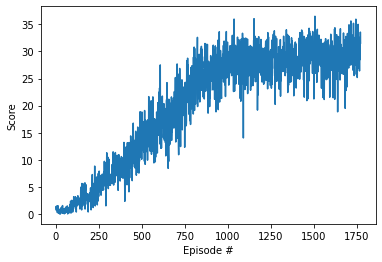

In [191]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(total_scores)+1), total_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()